In [7]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("C:/kaggle/weather/weather_prediction_dataset.csv")
label = pd.read_csv('C:/kaggle/weather/weather_prediction_bbq_labels.csv')

print(df.head(3))
# print(df.info())
df_columns_names = df.columns.tolist()  # 전체 칼럼 보기 위해 모든 칼럼명을 리스트로 변환
print(df_columns_names)
print(label.head(3))
print(label.info())

       DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  20000101      1                  8            0.89          1.0286   
1  20000102      1                  8            0.87          1.0318   
2  20000103      1                  5            0.81          1.0314   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.20                 0.03             0.0   
1                    0.25                 0.00             0.0   
2                    0.50                 0.00             3.7   

   BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_min  \
0              2.9             1.6  ...                -9.3   
1              3.6             2.7  ...                 0.5   
2              2.2             0.1  ...                -1.0   

   STOCKHOLM_temp_max  TOURS_wind_speed  TOURS_humidity  TOURS_pressure  \
0                 0.7               1.6            0.97          1.0275   
1                 2.0               2.0

In [8]:
# 부다페스트만 선별하기
df_BUDAPEST = pd.concat([df.iloc[:, :2], df.iloc[:, 11:19]], axis=1)
print(df_BUDAPEST)

# DATE를 날짜형으로 바꿔주기
df_BUDAPEST['DATE'] = pd.to_datetime(df_BUDAPEST['DATE'], format='%Y%m%d')
print(df_BUDAPEST.DATE)

          DATE  MONTH  BUDAPEST_cloud_cover  BUDAPEST_humidity  \
0     20000101      1                     3               0.92   
1     20000102      1                     8               0.94   
2     20000103      1                     6               0.95   
3     20000104      1                     8               0.94   
4     20000105      1                     5               0.88   
...        ...    ...                   ...                ...   
3649  20091228     12                     1               0.61   
3650  20091229     12                     3               0.59   
3651  20091230     12                     8               0.93   
3652  20091231     12                     6               0.90   
3653  20100101      1                     6               0.65   

      BUDAPEST_pressure  BUDAPEST_global_radiation  BUDAPEST_precipitation  \
0                1.0268                       0.52                    0.00   
1                1.0297                       0.14 

In [9]:
def mean_month(df, feature):
    monthly_mean = df.groupby(df_BUDAPEST['DATE'])[feature].mean().round(2)
    return monthly_mean.tolist()

In [10]:
print(df_BUDAPEST.drop(['MONTH'], axis=1).describe())

                      DATE  BUDAPEST_cloud_cover  BUDAPEST_humidity  \
count                 3654           3654.000000        3654.000000   
mean   2004-12-31 12:00:00              4.890531           0.656505   
min    2000-01-01 00:00:00              0.000000           0.260000   
25%    2002-07-02 06:00:00              3.000000           0.540000   
50%    2004-12-31 12:00:00              5.000000           0.650000   
75%    2007-07-02 18:00:00              7.000000           0.770000   
max    2010-01-01 00:00:00              8.000000           1.000000   
std                    NaN              2.386442           0.149603   

       BUDAPEST_pressure  BUDAPEST_global_radiation  BUDAPEST_precipitation  \
count        3654.000000                3654.000000             3654.000000   
mean            1.016935                   1.465487                0.136442   
min             0.989100                   0.040000                0.000000   
25%             1.012100                   0

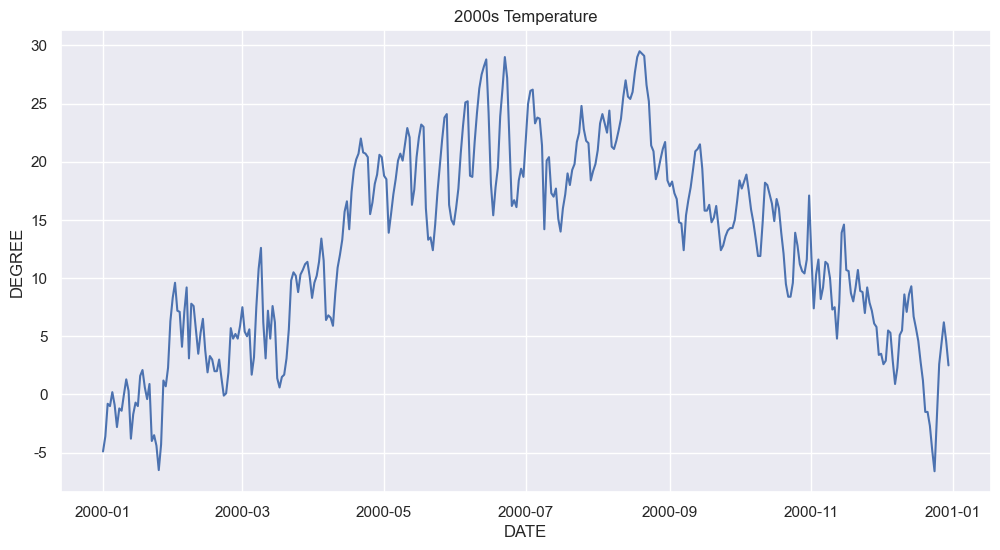

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
        
sns.set(style='darkgrid')
plt.figure(figsize=(12,6))
plt.plot(df_BUDAPEST.DATE[:365], df_BUDAPEST.BUDAPEST_temp_mean[:365])
plt.title('2000s Temperature')
plt.xlabel('DATE')
plt.ylabel('DEGREE')
plt.show()

In [13]:
# DATE 컬럼을 연도, 월, 일로 분리
df_BUDAPEST['YEAR'] = df_BUDAPEST['DATE'].dt.year
df_BUDAPEST['MONTH'] = df_BUDAPEST['DATE'].dt.month
df_BUDAPEST['DAY'] = df_BUDAPEST['DATE'].dt.day

In [17]:
# 부다페스트의 온도 예측하는 머신러닝 모델 만들기
from sklearn.model_selection import train_test_split
import xgboost
from xgboost import plot_importance

x = df_BUDAPEST.drop(columns=['BUDAPEST_temp_mean','BUDAPEST_temp_max','DATE'])
y = df_BUDAPEST.BUDAPEST_temp_mean

(2923, 9) (731, 9) (2923,) (731,)


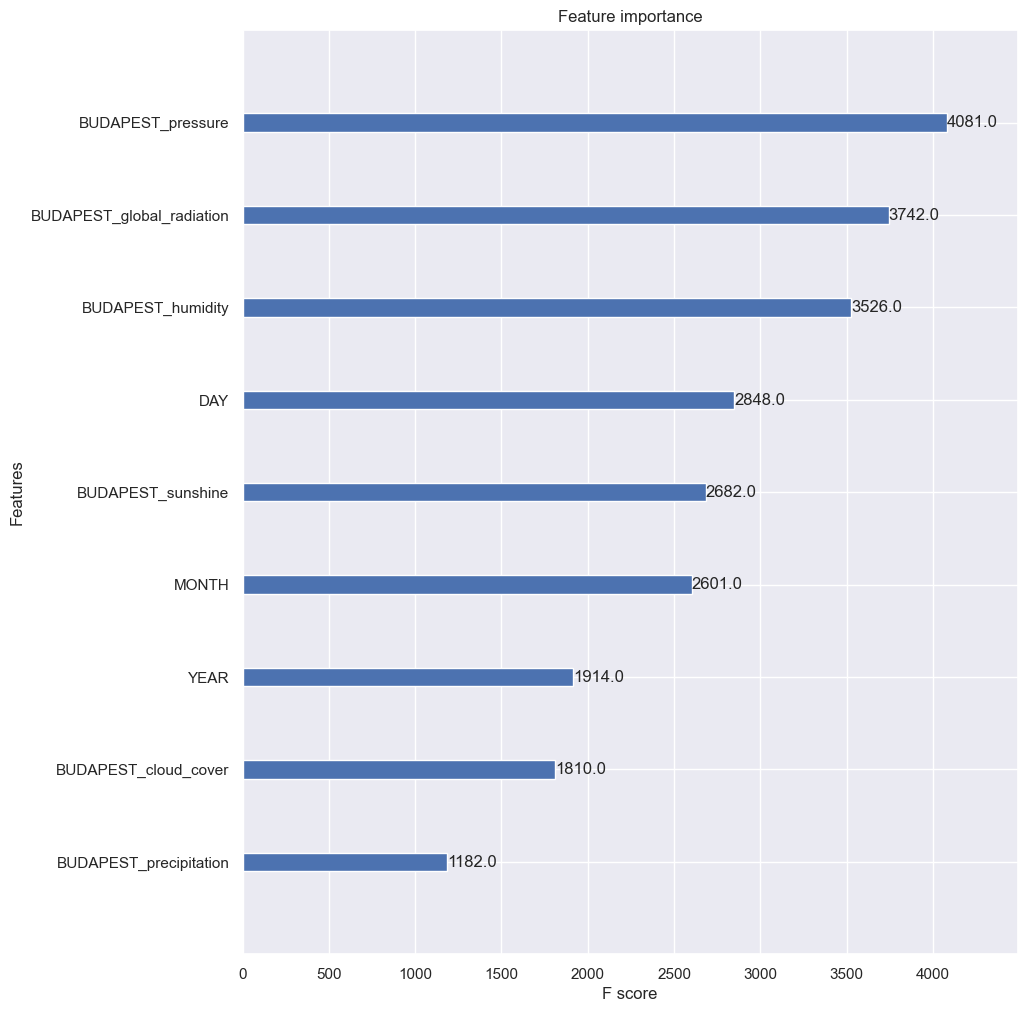

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=12)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = xgboost.XGBRegressor(booster = 'gbtree', max_depth=6, n_estimators=500).fit(x_train, y_train)

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(model, ax=ax)
plt.show()

In [19]:
# DATE 컬럼을 연도, 월, 일로 분리
df_BUDAPEST['YEAR'] = df_BUDAPEST['DATE'].dt.year
df_BUDAPEST['MONTH'] = df_BUDAPEST['DATE'].dt.month
df_BUDAPEST['DAY'] = df_BUDAPEST['DATE'].dt.day

#  부다페스트의 온도 예측하는 머신러닝 모델 만들기

In [20]:
# 랜덤포레스트 모델
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(max_depth=5, random_state=12)
rf_reg.fit(x_train, y_train)

# 랜덤포레스트 모델의 성능 파악하기
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

y_pred_rf = rf_reg.predict(x_test)

# MSE, MAE, R² Score 구하기
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print('rf_mse : ', rf_mse)  # rf_mse :  11.85920542094453
print('rf_mae : ', rf_mae)  # rf_mae :  2.7752567344497807
print('rf_r2 : ', rf_r2)    # rf_r2 :  0.8483616117437748

rf_mse :  11.85920542094453
rf_mae :  2.7752567344497807
rf_r2 :  0.8483616117437748


In [21]:
# SVR 모델
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
svr_model = SVR(verbose=True, kernel='linear')
svr_model.fit(x_train, y_train)

y_pred_svr = svr_model.predict(x_test)

svr_mse = mean_squared_error(y_test, y_pred_svr)
svr_r2_score = r2_score(y_test, y_pred_svr)

print('svr_mse : ', svr_mse)            # 24.620970191227293
print('svr_r2_score : ', svr_r2_score)  # 0.6851825982785853

[LibSVM]svr_mse :  24.620970191227293
svr_r2_score :  0.6851825982785853


In [22]:
# 다중회귀모델
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
print('lr score : ', lr.score(x_train, y_train))

# 학습 데이터에 대한 성능 평가 (R² Score)
train_r2 = lr.score(x_train, y_train)
print('Training R² score:', train_r2)

# 테스트 데이터에 대한 예측
y_pred_lr = lr.predict(x_test)

# 테스트 데이터에 대한 성능 평가
test_mse = mean_squared_error(y_test, y_pred_lr)
test_r2 = r2_score(y_test, y_pred_lr)

print('lr_Test MSE:', test_mse)
print('lr_Test R² score:', test_r2)

lr score :  0.7220891485036467
Training R² score: 0.7220891485036467
lr_Test MSE: 21.87911645251659
lr_Test R² score: 0.7202414632711847
